# Exploratory Data Analysis

## Importing Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
pd.set_option("display.max_rows", 15)

In [4]:
athletes_df = pd.read_excel('../data/2021/Athletes.xlsx', engine='openpyxl', sheet_name='Details')
coaches_df = pd.read_excel('../data/2021/Coaches.xlsx', engine='openpyxl', sheet_name='Details')
entries_df = pd.read_excel('../data/2021/EntriesGender.xlsx', engine='openpyxl', sheet_name='Details')
medals_df = pd.read_excel('../data/2021/Medals.xlsx', engine='openpyxl', sheet_name='Details')
teams_df = pd.read_excel('../data/2021/Teams.xlsx', engine='openpyxl', sheet_name='Details')

# 2021 Tokyo Olympics Data

## Athlete Data

In [5]:
athletes_df

Name      NOC           Discipline
0            AALERUD Katrine   Norway         Cycling Road
1                ABAD Nestor    Spain  Artistic Gymnastics
2          ABAGNALE Giovanni    Italy               Rowing
3             ABALDE Alberto    Spain           Basketball
4              ABALDE Tamara    Spain           Basketball
...                      ...      ...                  ...
11080  ZWICKER Martin Detlef  Germany               Hockey
11081      ZWOLINSKA Klaudia   Poland         Canoe Slalom
11082           ZYKOVA Yulia      ROC             Shooting
11083      ZYUZINA Ekaterina      ROC              Sailing
11084        ZYZANSKA Sylwia   Poland              Archery

[11085 rows x 3 columns]

In [6]:
noc_df = athletes_df[['NOC', 'Discipline']]

In [7]:
noc_df.shape

(11085, 2)

In [8]:
noc_df['NOC'].nunique()

206

In [9]:
noc_df['Discipline'].nunique()

46

<Axes: xlabel='NOC', ylabel='count'>

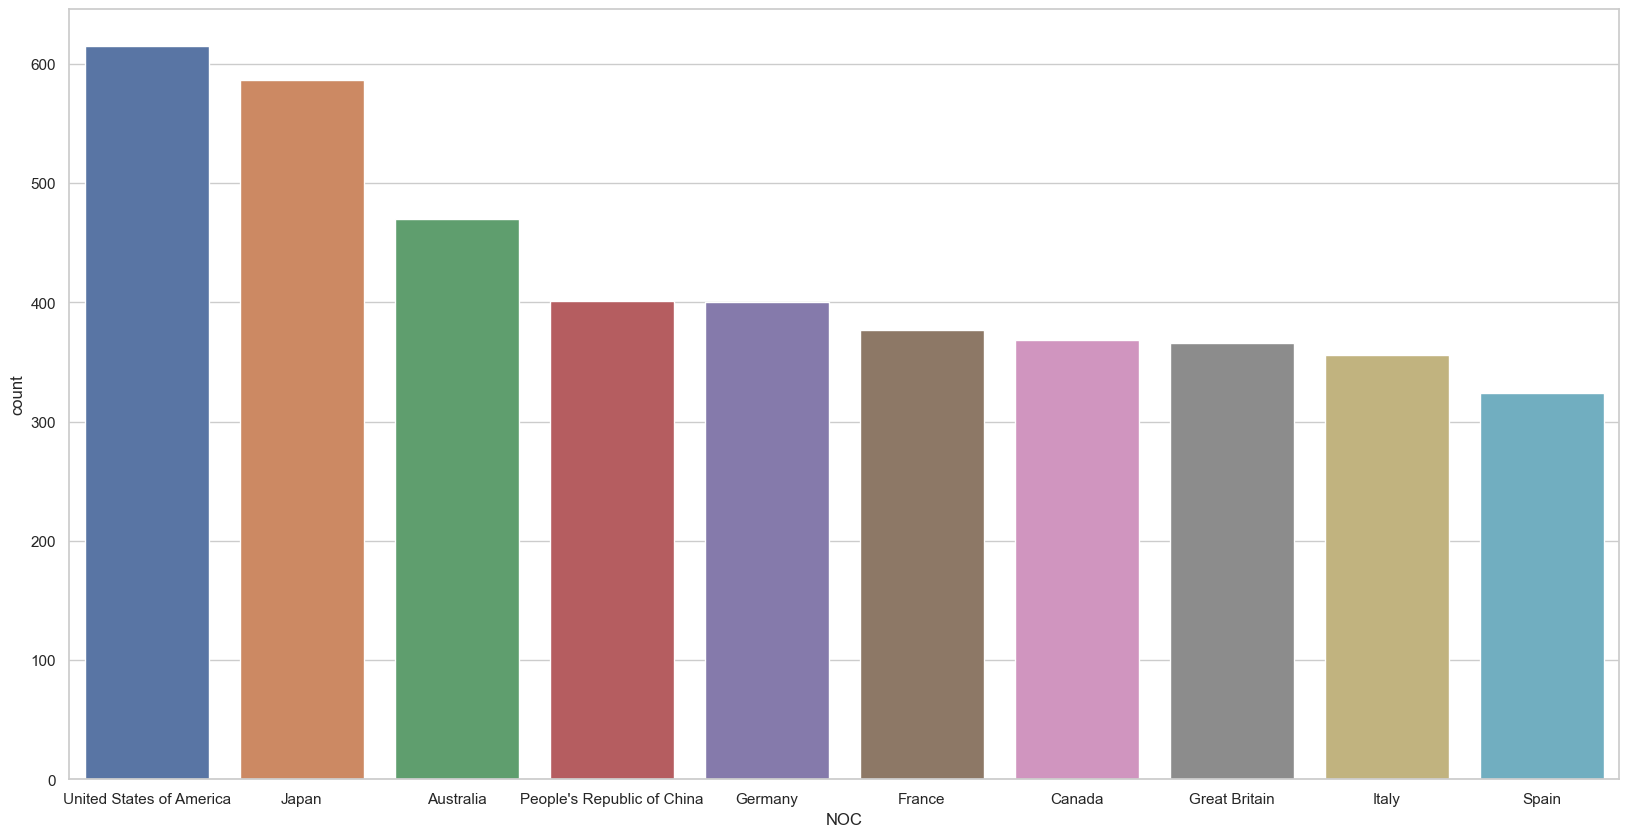

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='NOC', data=athletes_df, order=athletes_df['NOC'].value_counts().index[:10])

In [11]:
athletes_df['NOC'].value_counts()

NOC
United States of America       615
Japan                          586
Australia                      470
People's Republic of China     401
Germany                        400
                              ... 
United Republic of Tanzania      2
Saint Kitts and Nevis            2
Marshall Islands                 2
Vanuatu                          2
South Sudan                      2
Name: count, Length: 206, dtype: int64

In [12]:
athletes_df['Discipline'].nunique()

46

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Athletics'),
  Text(1, 0, 'Swimming'),
  Text(2, 0, 'Football'),
  Text(3, 0, 'Rowing'),
  Text(4, 0, 'Hockey'),
  Text(5, 0, 'Judo'),
  Text(6, 0, 'Handball'),
  Text(7, 0, 'Shooting'),
  Text(8, 0, 'Sailing'),
  Text(9, 0, 'Rugby Sevens'),
  Text(10, 0, 'Basketball'),
  Text(11, 0, 'Wrestling'),
  Text(12, 0, 'Volleyball'),
  Text(13, 0, 'Boxing'),
  Text(14, 0, 'Water Polo'),
  Text(15, 0, 'Fencing'),
  Text(16, 0, 'Equestrian'),
  Text(17, 0, 'Canoe Sprint'),
  Text(18, 0, 'Baseball/Softball'),
  Text(19, 0, 'Cycling Track')])

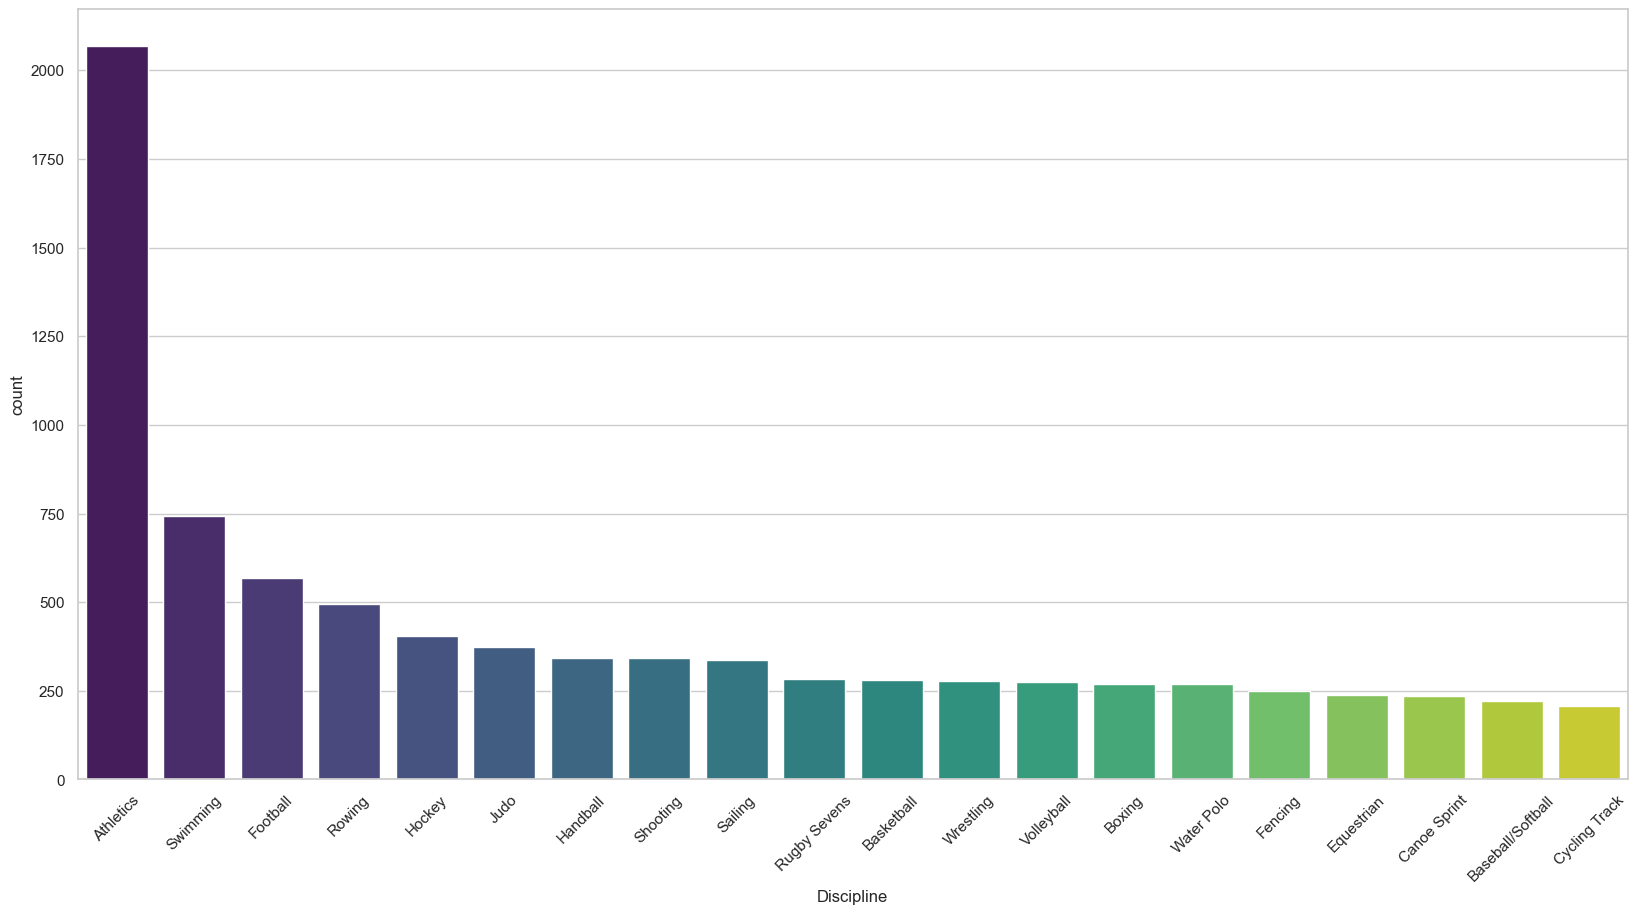

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Discipline', data=athletes_df, order=athletes_df['Discipline'].value_counts().index[:20], palette='viridis')
plt.xticks(rotation=45)

## Medals

In [14]:
medals_df

Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17     58   
3      4               Great Britain    22      21      22     65   
4      5                         ROC    20      28      23     71   
..   ...                         ...   ...     ...     ...    ...   
88    86                       Ghana     0       0       1      1   
89    86                     Grenada     0       0       1      1   
90    86                      Kuwait     0       0       1      1   
91    86         Republic of Moldova     0       0       1      1   
92    86        Syrian Arab Republic     0       0       1      1   

    Rank by Total  
0               1  
1               2  
2               5  
3               4  
4               3  
..            ...  
88             77  
89             77  
90             77  
91             77  
92             77  

[93 rows x 7 columns]

In [15]:
medals_df['Team/NOC'].nunique()

93

## Teams

In [16]:
teams_df

Name      Discipline                         NOC  Event
0          Belgium  3x3 Basketball                     Belgium    Men
1            China  3x3 Basketball  People's Republic of China    Men
2            China  3x3 Basketball  People's Republic of China  Women
3           France  3x3 Basketball                      France  Women
4            Italy  3x3 Basketball                       Italy  Women
..             ...             ...                         ...    ...
738   South Africa      Water Polo                South Africa  Women
739          Spain      Water Polo                       Spain    Men
740          Spain      Water Polo                       Spain  Women
741  United States      Water Polo    United States of America    Men
742  United States      Water Polo    United States of America  Women

[743 rows x 4 columns]

In [17]:
teams_df['Discipline'].nunique()

20

In [18]:
teams_df['NOC'].nunique()

84

In [19]:
filtered_df = teams_df[teams_df['Name'] != teams_df['NOC']]

In [20]:
unique_pairs = filtered_df.drop_duplicates(subset=['Name', 'NOC'])

In [21]:
unique_pairs

Name           Discipline  \
1                                China       3x3 Basketball   
15                       United States       3x3 Basketball   
54                     Rep. of Moldova              Archery   
84                               Korea  Artistic Gymnastics   
144                     Dominican Rep.            Athletics   
..                                 ...                  ...   
661       ACHANTA Kamal / BATRA Manika         Table Tennis   
663            MIZUTANI Jun / ITO Mima         Table Tennis   
668            LEE Sangsu / JEON Jihee         Table Tennis   
670  IONESCU Ovidiu / SZOCS Bernadette         Table Tennis   
674  PISTEJ Lubomir / BALAZOVA Barbora         Table Tennis   

                            NOC                 Event  
1    People's Republic of China                   Men  
15     United States of America                 Women  
54          Republic of Moldova            Mixed Team  
84            Republic of Korea            Men's Team  
144          Dominican Republic  4 x 400m Relay Mixed  
..                          ...                   ...  
661                       India         Mixed Doubles  
663                       Japan         Mixed Doubles  
668           Republic of Korea         Mixed Doubles  
670                     Romania         Mixed Doubles  
674                    Slovakia         Mixed Doubles  

[72 rows x 4 columns]

In [22]:
teams_df['Name'].value_counts()

Name
Japan                45
United States        43
Italy                34
Germany              32
France               32
                     ..
Ludwig/Kozuch         1
Thole J./Wickler      1
Perusic/Schweiner     1
Lidy/Leila            1
Venezuela             1
Name: count, Length: 146, dtype: int64

In [23]:
teams_df['NOC'].nunique()

84

In [24]:
teams_df['Event'].value_counts()

Event
Men                     120
Women                   114
Men's Team               40
Women's Team             40
Mixed Team               29
                       ... 
Men's Team Sprint         8
Men's Team Pursuit        8
Women's Team Pursuit      8
Baseball                  6
Softball                  6
Name: count, Length: 36, dtype: int64

In [25]:
teams_df['Discipline'].nunique()

20

## Entries Gender

In [26]:
entries_df

Discipline  Female  Male  Total
0        3x3 Basketball      32    32     64
1               Archery      64    64    128
2   Artistic Gymnastics      98    98    196
3     Artistic Swimming     105     0    105
4             Athletics     969  1072   2041
..                  ...     ...   ...    ...
41            Triathlon      55    55    110
42           Volleyball     144   144    288
43           Water Polo     122   146    268
44        Weightlifting      98    99    197
45            Wrestling      96   193    289

[46 rows x 4 columns]

In [27]:
entries_df['Discipline'].nunique()

46

## Coaches

In [28]:
coaches_df

Name                         NOC         Discipline  \
0           ABDELMAGID Wael                       Egypt           Football   
1                 ABE Junya                       Japan         Volleyball   
2             ABE Katsuhiko                       Japan         Basketball   
3              ADAMA Cherif               Côte d'Ivoire           Football   
4                AGEBA Yuya                       Japan         Volleyball   
..                      ...                         ...                ...   
389  ZAMORA PEDREIRA Javier                       Spain         Basketball   
390      ZAMPIERI Francesca               Liechtenstein  Artistic Swimming   
391          ZHANG Xiaohuan  People's Republic of China  Artistic Swimming   
392              ZIJP Simon                 Netherlands             Hockey   
393           ZONDI Nkuliso                South Africa             Hockey   

     Event  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
389    NaN  
390   Duet  
391    NaN  
392    NaN  
393  Women  

[394 rows x 4 columns]

# All Olympic Data

In [29]:
athlete_events = pd.read_csv('../data/all_data/athlete_events.csv')

In [94]:
athlete_events.shape

(271116, 15)

In [39]:
athlete_events.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [93]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [174]:
athlete_events['NOC'].nunique()

230

In [127]:
athlete_events.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

## Cleaning Data

In [38]:
athlete_events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [40]:
athlete_events['Medal'] = athlete_events['Medal'].fillna('None')

In [41]:
athlete_events.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

## Data after 1960

In [111]:
recent_data = athlete_events[athlete_events['Year'] >= 1960]
# recent_data = athlete_events

In [152]:
recent_data.describe()

ID           Age        Height        Weight          Year
count   83926.000000  83926.000000  83926.000000  83926.000000  83926.000000
mean    69026.637776     25.869790    175.860151     71.131866   2007.979649
std     39178.591399      5.446957     10.977290     15.294159      5.457986
min         2.000000     12.000000    133.000000     28.000000   2000.000000
25%     35464.000000     22.000000    168.000000     60.000000   2004.000000
50%     69269.000000     25.000000    176.000000     70.000000   2008.000000
75%    102799.250000     29.000000    183.000000     80.000000   2012.000000
max    135571.000000     71.000000    226.000000    214.000000   2016.000000

In [112]:
recent_data['Year'].value_counts()

Year
2000    13821
2016    13688
2008    13602
2004    13443
2012    12920
2014     4891
2010     4402
2006     4382
2002     4109
Name: count, dtype: int64

In [113]:
recent_data['Sport'].nunique()

51

In [114]:
recent_data.isnull().sum()

ID           0
Name         0
Sex          0
Age          3
Height     711
Weight    1210
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [115]:
missing_values_by_year = recent_data.groupby('Year').apply(lambda x: x.isnull().sum())
missing_values_by_year

ID  Name  Sex  Age  Height  Weight  Team  NOC  Games  Year  Season  \
Year                                                                       
2000   0     0    0    1     123     126     0    0      0     0       0   
2002   0     0    0    0      29      47     0    0      0     0       0   
2004   0     0    0    0      36      37     0    0      0     0       0   
2006   0     0    0    0       6      16     0    0      0     0       0   
2008   0     0    0    2     151     159     0    0      0     0       0   
2010   0     0    0    0       2      24     0    0      0     0       0   
2012   0     0    0    0     168     360     0    0      0     0       0   
2014   0     0    0    0      20     218     0    0      0     0       0   
2016   0     0    0    0     176     223     0    0      0     0       0   

      City  Sport  Event  Medal  
Year                             
2000     0      0      0      0  
2002     0      0      0      0  
2004     0      0      0      0  
2006     0      0      0      0  
2008     0      0      0      0  
2010     0      0      0      0  
2012     0      0      0      0  
2014     0      0      0      0  
2016     0      0      0      0

In [116]:
recent_data = recent_data.dropna()

In [147]:
# Define function to identify outliers
def check_for_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 4.5 * IQR
    upper_bound = Q3 + 4.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [148]:
weight_outliers = check_for_outliers(recent_data, 'Weight')
weight_outliers

ID                         Name Sex   Age  Height  Weight  \
23155    12177            Ricardo Blas, Jr.   M  21.0   183.0   214.0   
23156    12177            Ricardo Blas, Jr.   M  25.0   183.0   214.0   
173166   87041       Dmitry Yuryevich Nosov   M  24.0   176.0   175.0   
205467  103159            Aytami Ruano Vega   M  27.0   200.0   198.0   
206004  103413  Leonel Wilfredo Ruz Carmona   M  29.0   187.0   178.0   
206352  103580           Valentyn Rusliakov   M  28.0   187.0   180.0   

             Team  NOC        Games  Year  Season     City Sport  \
23155        Guam  GUM  2008 Summer  2008  Summer  Beijing  Judo   
23156        Guam  GUM  2012 Summer  2012  Summer   London  Judo   
173166     Russia  RUS  2004 Summer  2004  Summer   Athina  Judo   
205467      Spain  ESP  2004 Summer  2004  Summer   Athina  Judo   
206004  Venezuela  VEN  2004 Summer  2004  Summer   Athina  Judo   
206352    Ukraine  UKR  2000 Summer  2000  Summer   Sydney  Judo   

                               Event   Medal  
23155         Judo Men's Heavyweight    None  
23156         Judo Men's Heavyweight    None  
173166  Judo Men's Half-Middleweight  Bronze  
205467        Judo Men's Heavyweight    None  
206004        Judo Men's Heavyweight    None  
206352        Judo Men's Heavyweight    None

- not outliers since its in the Judo Men's Heavyweight and middleweight category

In [149]:
height_outliers = check_for_outliers(recent_data, 'Height')
height_outliers

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal]
Index: []

- no outliers for height 

In [150]:
age_outliers = check_for_outliers(recent_data, 'Age')
age_outliers

ID               Name Sex   Age  Height  Weight  \
29912    15436     Julie Brougham   F  62.0   157.0    48.0   
90004    45610         Mary Hanna   F  61.0   173.0    63.0   
90005    45610         Mary Hanna   F  61.0   173.0    63.0   
97372    49287    Hiroshi Hoketsu   M  67.0   168.0    62.0   
97373    49287    Hiroshi Hoketsu   M  67.0   168.0    62.0   
97374    49287    Hiroshi Hoketsu   M  71.0   168.0    62.0   
129868   65378  Afanasijs Kuzmins   M  61.0   178.0    89.0   
129869   65378  Afanasijs Kuzmins   M  65.0   178.0    89.0   
157000   78863     Bruce Meredith   M  63.0   188.0    82.0   
159094   79855         Ian Millar   M  61.0   185.0    76.0   
159095   79855         Ian Millar   M  61.0   185.0    76.0   
159096   79855         Ian Millar   M  65.0   185.0    76.0   
159097   79855         Ian Millar   M  65.0   185.0    76.0   
241317  120874    Joan Tomas Roca   M  61.0   177.0    87.0   

                                Team  NOC        Games  Year  Season  \
29912                    New Zealand  NZL  2016 Summer  2016  Summer   
90004                      Australia  AUS  2016 Summer  2016  Summer   
90005                      Australia  AUS  2016 Summer  2016  Summer   
97372                          Japan  JPN  2008 Summer  2008  Summer   
97373                        Whisper  JPN  2008 Summer  2008  Summer   
97374                          Japan  JPN  2012 Summer  2012  Summer   
129868                        Latvia  LAT  2008 Summer  2008  Summer   
129869                        Latvia  LAT  2012 Summer  2012  Summer   
157000  United States Virgin Islands  ISV  2000 Summer  2000  Summer   
159094                        Canada  CAN  2008 Summer  2008  Summer   
159095                        Canada  CAN  2008 Summer  2008  Summer   
159096                        Canada  CAN  2012 Summer  2012  Summer   
159097                        Canada  CAN  2012 Summer  2012  Summer   
241317                       Andorra  AND  2012 Summer  2012  Summer   

                  City          Sport  \
29912   Rio de Janeiro  Equestrianism   
90004   Rio de Janeiro  Equestrianism   
90005   Rio de Janeiro  Equestrianism   
97372          Beijing  Equestrianism   
97373          Beijing  Equestrianism   
97374           London  Equestrianism   
129868         Beijing       Shooting   
129869          London       Shooting   
157000          Sydney       Shooting   
159094         Beijing  Equestrianism   
159095         Beijing  Equestrianism   
159096          London  Equestrianism   
159097          London  Equestrianism   
241317          London       Shooting   

                                                    Event   Medal  
29912            Equestrianism Mixed Dressage, Individual    None  
90004            Equestrianism Mixed Dressage, Individual    None  
90005                  Equestrianism Mixed Dressage, Team    None  
97372            Equestrianism Mixed Dressage, Individual    None  
97373                  Equestrianism Mixed Dressage, Team    None  
97374            Equestrianism Mixed Dressage, Individual    None  
129868        Shooting Men's Rapid-Fire Pistol, 25 metres    None  
129869        Shooting Men's Rapid-Fire Pistol, 25 metres    None  
157000  Shooting Men's Small-Bore Rifle, Prone, 50 metres    None  
159094            Equestrianism Mixed Jumping, Individual    None  
159095                  Equestrianism Mixed Jumping, Team  Silver  
159096            Equestrianism Mixed Jumping, Individual    None  
159097                  Equestrianism Mixed Jumping, Team    None  
241317                                Shooting Men's Trap    None

- Age is higher in sports like Shooting, Equestrianism Jumping as these are more skill based sports rather than physical sports.

In [153]:
# Calculate BMI
recent_data['BMI'] = recent_data['Weight'] / ((recent_data['Height'] / 100) ** 2)

## Visualizations

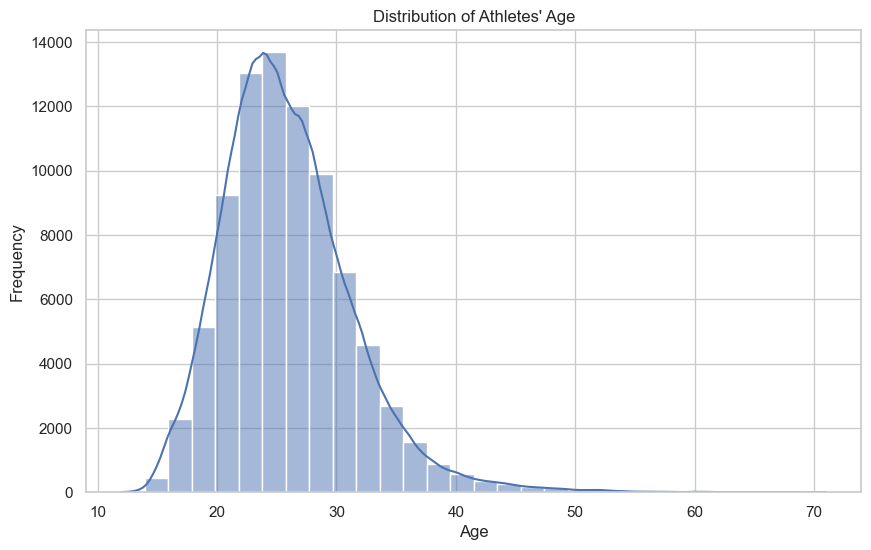

In [117]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(recent_data['Age'], bins=30, kde=True)
plt.title('Distribution of Athletes\' Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [118]:
df = px.data.tips()
fig = px.histogram(recent_data, x="Age", nbins=30, opacity=0.8) 

fig.update_layout(
    title_text='Distribution of Athletes\' Age', 
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Number of Athletes', # yaxis label
    bargap=0.02, # gap between bars of adjacent location coordinates
    bargroupgap=0.01 # gap between bars of the same location coordinates
)

fig.show()

In [119]:
df = px.data.tips()
fig = px.histogram(recent_data, x="Age", nbins=30, opacity=0.8, color='Sex') 

fig.update_layout(
    title_text='Distribution of Athletes\' Age by Sex', 
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Number of Athletes', # yaxis label
    bargap=0.02, # gap between bars of adjacent location coordinates
    bargroupgap=0.01 # gap between bars of the same location coordinates
)

fig.show()

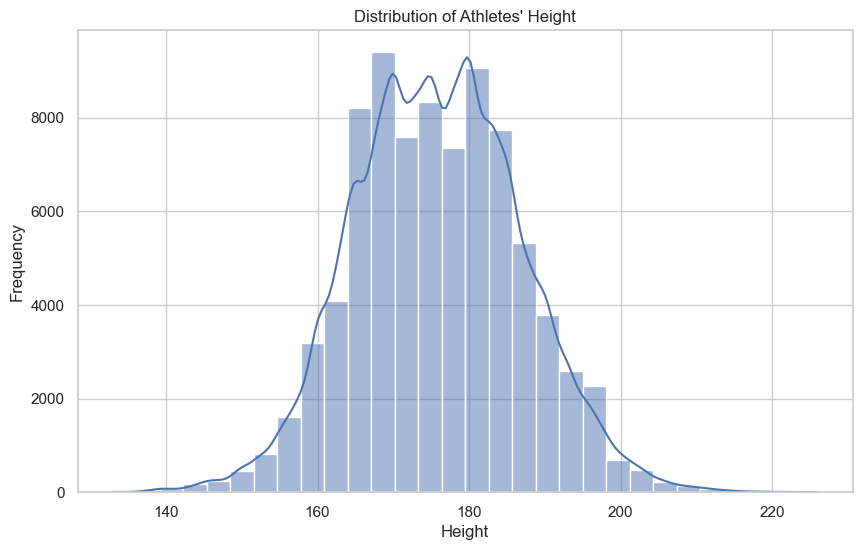

In [120]:
# Distribution of Height
plt.figure(figsize=(10, 6))
sns.histplot(recent_data['Height'], bins=30, kde=True)
plt.title('Distribution of Athletes\' Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [121]:
df = px.data.tips()
fig = px.histogram(recent_data, x="Height", nbins=30, title='Distribution of Athletes\' Height', opacity=0.8, color='Sex') 

fig.update_layout(
    title_text='Distribution of Athletes\' Height by Sex', 
    xaxis_title_text='Height', # xaxis label
    yaxis_title_text='Number of Athletes', # yaxis label
    bargap=0.02, # gap between bars of adjacent location coordinates
    bargroupgap=0.01 # gap between bars of the same location coordinates
)
fig.show()

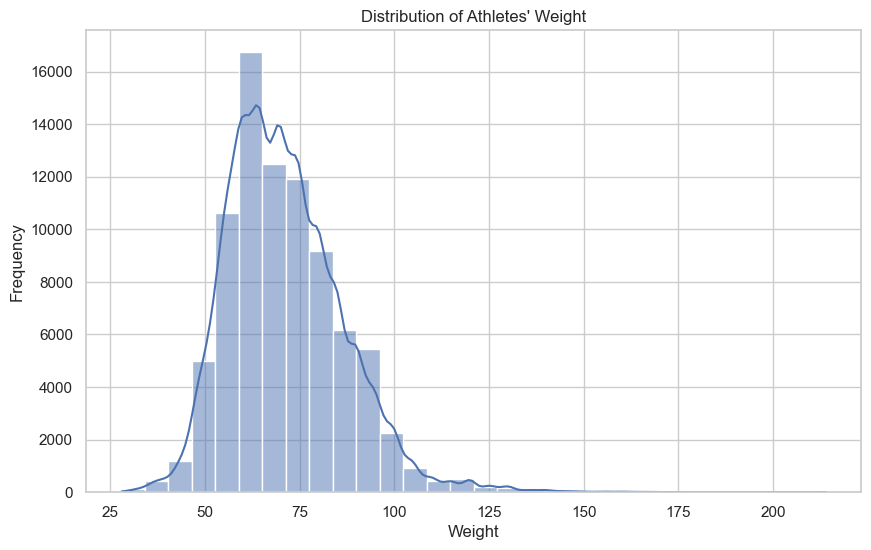

In [122]:
# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(recent_data['Weight'], bins=30, kde=True)
plt.title('Distribution of Athletes\' Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [123]:
df = px.data.tips()
fig = px.histogram(recent_data, x="Weight", nbins=30, title='Distribution of Athletes\' Weight', opacity=0.8, color='Sex') 

fig.update_layout(
    title_text='Distribution of Athletes\' Weight by Sex', 
    xaxis_title_text='Weight', # xaxis label
    yaxis_title_text='Number of Athletes', # yaxis label
    bargap=0.02, # gap between bars of adjacent location coordinates
    bargroupgap=0.01 # gap between bars of the same location coordinates
)
fig.show()

In [154]:
df = px.data.tips()
fig = px.histogram(recent_data, x="BMI", nbins=30, opacity=0.8, color='Sex') 

fig.update_layout(
    title_text='Distribution of Athletes\' BMI by Sex', 
    xaxis_title_text='BMI', # xaxis label
    yaxis_title_text='Number of Athletes', # yaxis label
    bargap=0.02, # gap between bars of adjacent location coordinates
    bargroupgap=0.01 # gap between bars of the same location coordinates
)

fig.show()

In [173]:
# Calculate counts by sport
sport_counts = recent_data['Sport'].value_counts().reset_index()
sport_counts.columns = ['Sport', 'Count']

# Select top 10 sports by count
top_15_sports = sport_counts.head(15)['Sport']

# Filter the original data to include only the top 10 sports
top_15_data = recent_data[recent_data['Sport'].isin(top_15_sports)]

# Create the histogram for the top 10 sports
fig = px.histogram(top_15_data, x="Sport", color="Sex", barmode='group', title="Top 15 Sports Distribution by Sex")
fig.update_layout(xaxis={'categoryorder':'total descending'}, height=600)
fig.show()

In [168]:
sport_sex_distribution = recent_data.groupby(['Sport', 'Sex']).size().reset_index(name='Count')

In [170]:
# Create a stacked bar plot
fig = px.bar(sport_sex_distribution, x="Sport", y="Count", color="Sex", 
             title="Participants by Sex for Each Sport",
             labels={'Count': 'Number of Participants'},
             barmode='stack')

fig.update_layout(xaxis={'categoryorder':'total descending'}, height=600)
fig.show()


In [180]:
recent_data['Medal'].value_counts()

Medal
None      71881
Bronze     4121
Gold       3971
Silver     3953
Name: count, dtype: int64

In [181]:
medal_data = recent_data[recent_data['Medal'] != 'None']
medal_counts = medal_data.groupby('NOC')['Medal'].count().reset_index()
medal_counts.columns = ['Country', 'Medal_Count']

fig = px.choropleth(medal_counts, locations='Country', locationmode='ISO-3', color='Medal_Count',
                    title="Medal Distribution by Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [189]:
countries_data = medal_data[medal_data['NOC'].isin(medal_counts['Country'])]

# Create a bar chart with dropdown
fig = px.bar(countries_data, x='NOC', color='Medal', title="Medals Distribution by Country",
             category_orders={'Medal': ['Gold', 'Silver', 'Bronze']},
             color_discrete_map={'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'})

fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    xaxis=dict(
        linecolor='black',
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        linecolor='black',
        showgrid=False,
        showline=True
    ),
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All Medals",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "All Medals"}]),
                dict(label="Gold",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Gold Medals"}]),
                dict(label="Silver",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Silver Medals"}]),
                dict(label="Bronze",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Bronze Medals"}]),
            ]),
        )
    ]
)

# Update title font and size
fig.update_layout(
    title_font=dict(size=24, color='black'),
    xaxis_title_font=dict(size=18, color='black'),
    yaxis_title_font=dict(size=18, color='black'),
    legend_title_font=dict(size=16, color='black')
)

fig.show()


## Hypothesis Testing Ideas

- likely age to win (age affect on chances at winning, are older ppl taking L)
- country prior wins -> win more
- hosting country gets advantage
- num of participants vs medals
- gdp per capita vs medals
- youth population vs medals
- age of coaches vs medals

## NOC Regions

In [125]:
noc_regions = pd.read_csv('../data/all_data/noc_regions.csv')

In [126]:
noc_regions

NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]